# Heart Disease Classification

### Data Description

1. age: age in years 
2. sex: sex (1 = male; 0 = female) 
3. cp: chest pain type 
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
5. chol: serum cholestoral in mg/dl 
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. restecg: resting electrocardiographic results 
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment 
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. target: have disease or not( yes=1, no=0)

In [3]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [4]:
# importing dataset

df = pd.read_csv('/Users/ahmedbinnayeem/Downloads/heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
# sns.boxplot(df['trestbps'])

# df[df['trestbps']>170]

# df.drop(df[df['trestbps']>170].index)

In [6]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# description about dataset

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.shape

(1025, 14)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.notnull().sum()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Exploratory Data Analysis (EDA)

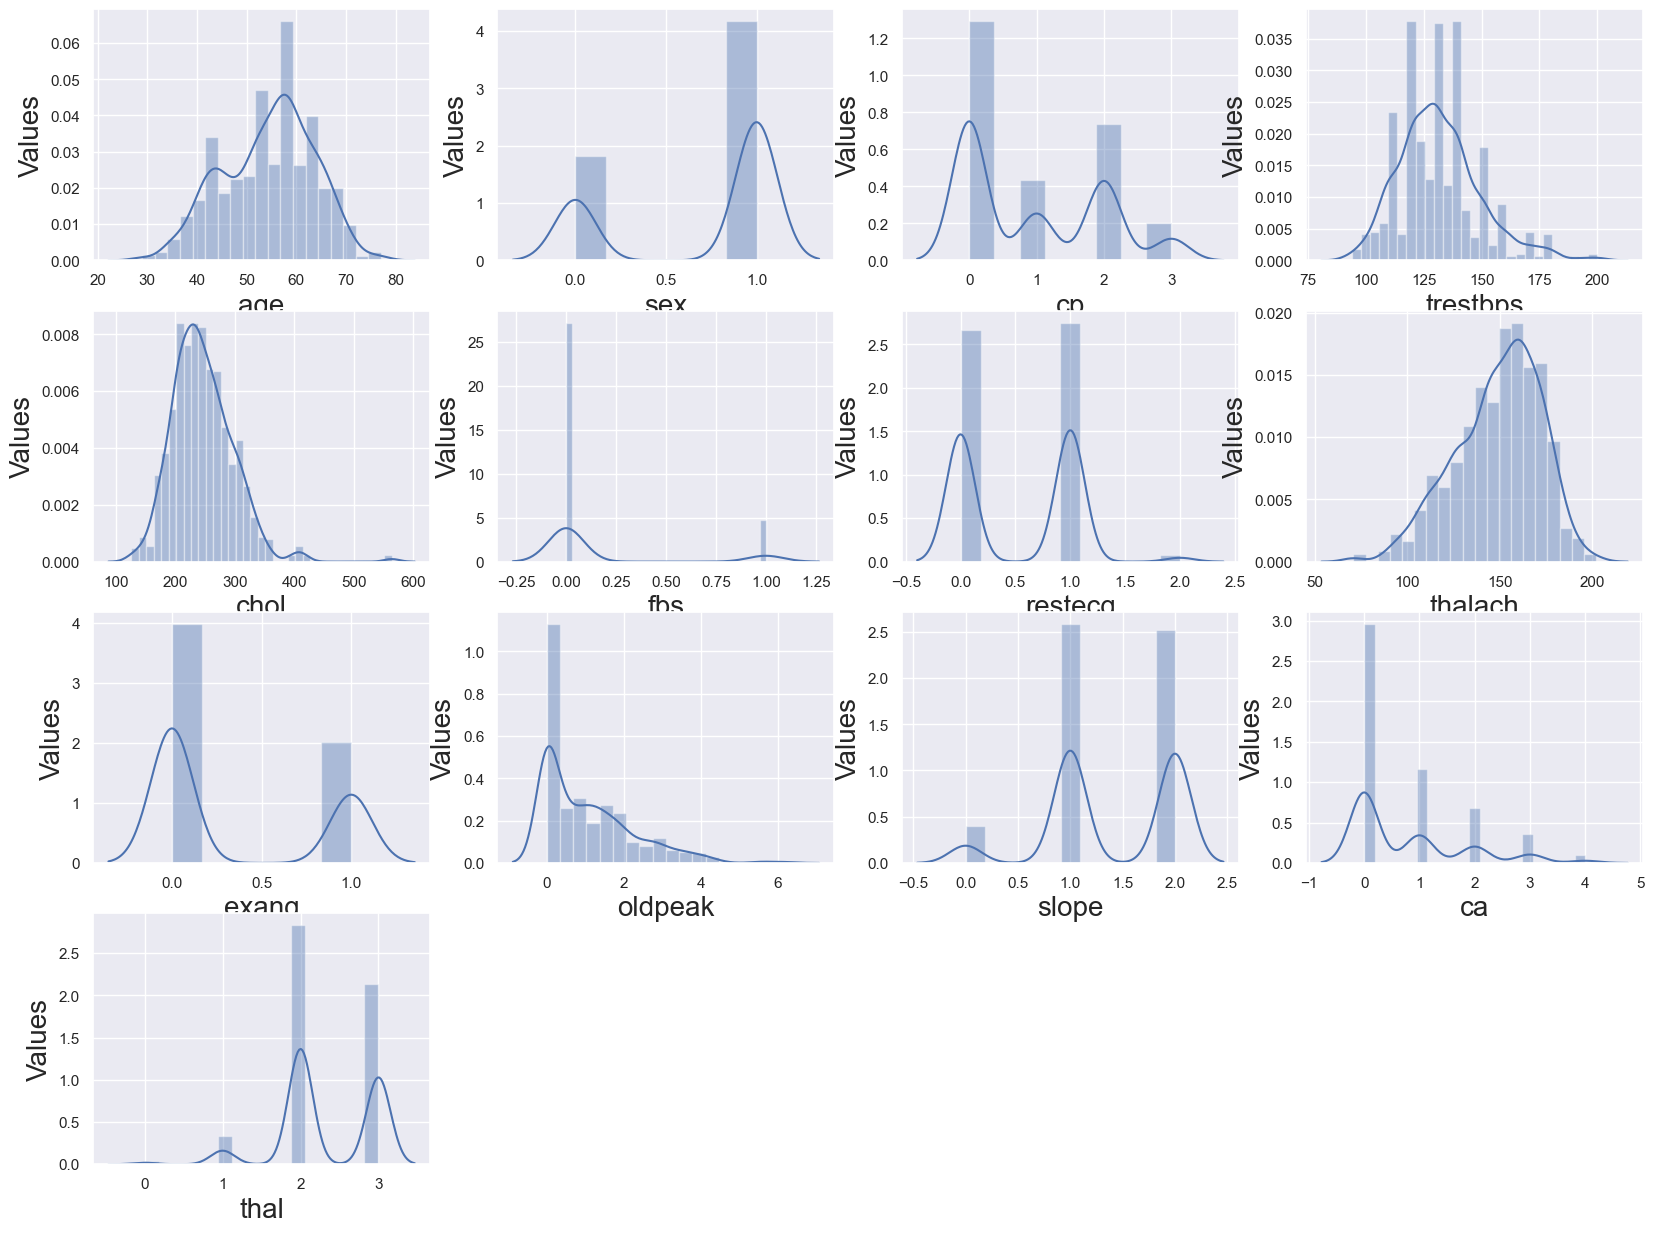

In [12]:
# Plotting the distribution plot.

plt.figure(figsize = (20,15))
plotnumber = 1

for column in df:
    if plotnumber < 14:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Values', fontsize=20)
        
    plotnumber += 1
    
plt.show()

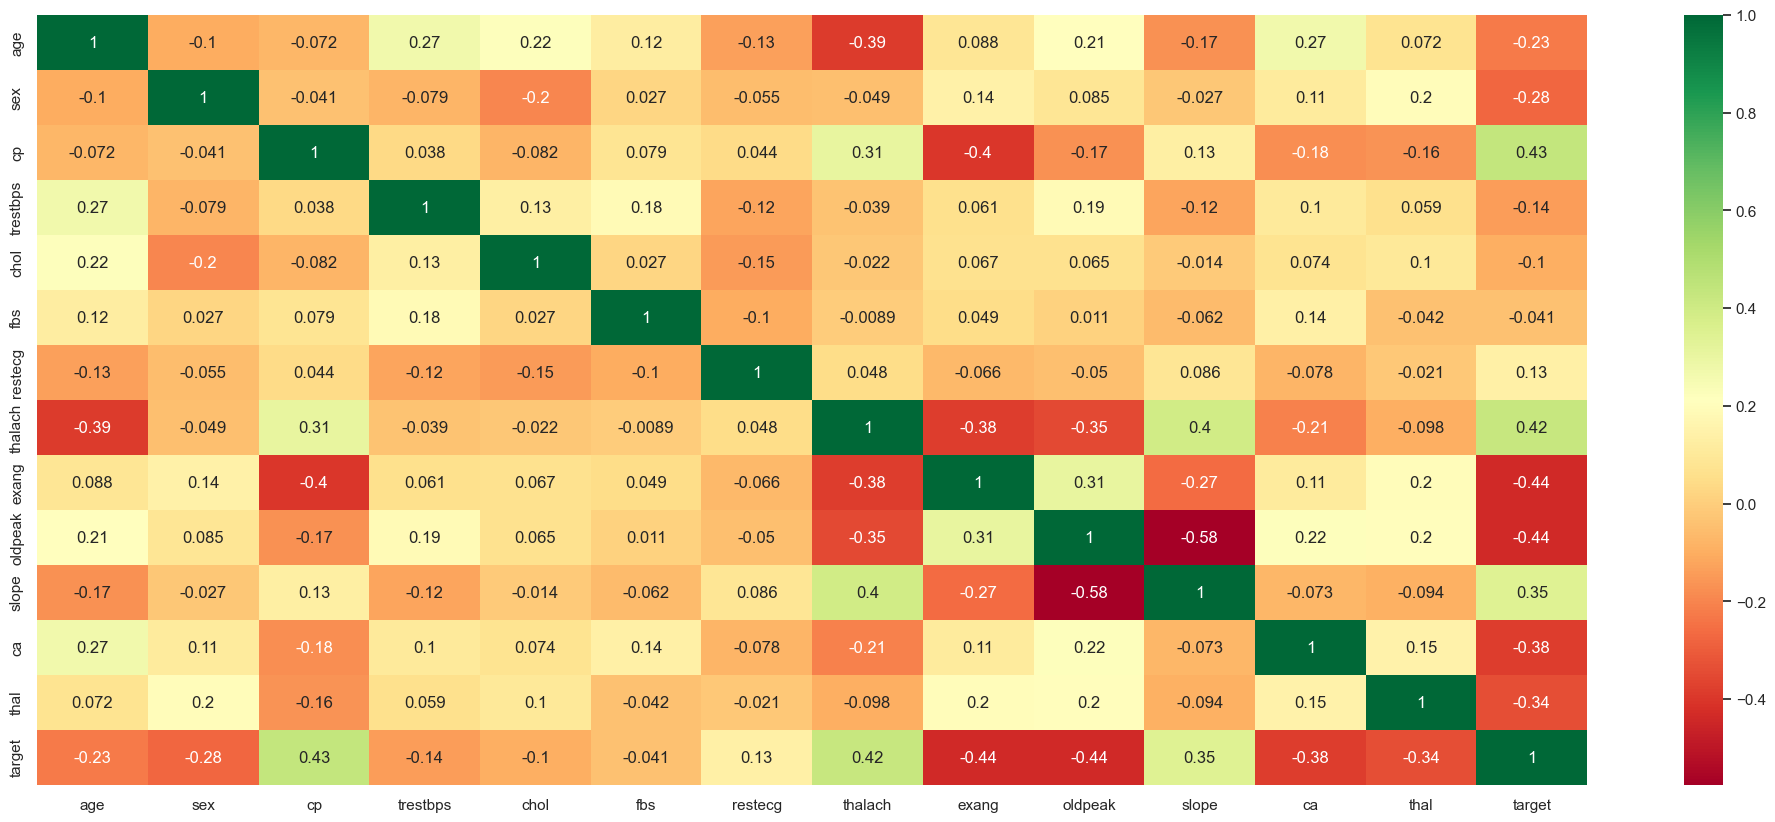

In [13]:

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: xlabel='target', ylabel='count'>

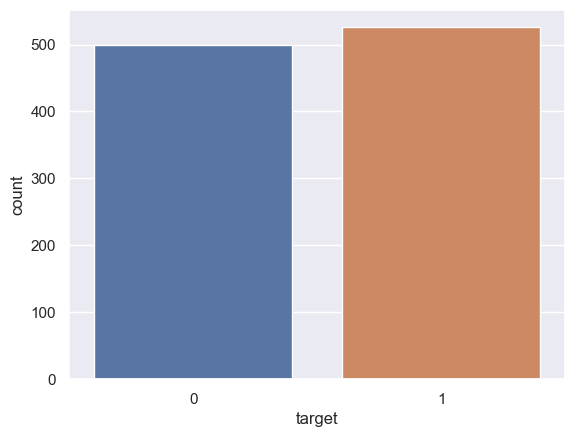

In [14]:
# Outcome countplot
sns.countplot(x = 'target', data = df)

In [15]:
# checking the variance
df.var()

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

we can see, there is a huge variance, hence need to normalize it.

## Normalization

In [16]:
df['trestbps']=np.log(df['trestbps'])
df['chol']=np.log(df['chol'])
df['thalach']=np.log(df['thalach'])

df['age']=np.log(df['age'])
np.var(df[['trestbps','chol','thalach','age']])

trestbps    0.016843
chol        0.041430
thalach     0.027516
age         0.030751
dtype: float64

In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,3.951244,1,0,4.828314,5.356586,0,1,5.123964,0,1.0,2,2,3
1,3.970292,1,0,4.941642,5.313206,1,0,5.043425,1,3.1,0,0,3
2,4.248495,1,0,4.976734,5.159055,0,1,4.828314,1,2.6,0,0,3
3,4.110874,1,0,4.997212,5.313206,0,1,5.081404,0,0.0,2,1,3
4,4.127134,0,0,4.927254,5.683580,1,1,4.663439,0,1.9,1,3,2


In [22]:
X = df.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,3.951244,1,0,4.828314,5.356586,0,1,5.123964,0,1.0,2,2,3
1,3.970292,1,0,4.941642,5.313206,1,0,5.043425,1,3.1,0,0,3
2,4.248495,1,0,4.976734,5.159055,0,1,4.828314,1,2.6,0,0,3
3,4.110874,1,0,4.997212,5.313206,0,1,5.081404,0,0.0,2,1,3
4,4.127134,0,0,4.927254,5.683580,1,1,4.663439,0,1.9,1,3,2


In [23]:
y=df["target"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Splitting the dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [25]:
len(X_train), len(X_test)

(768, 257)

## Scaling the data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

# Model Building

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression Model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression Model: 78.59922178988327


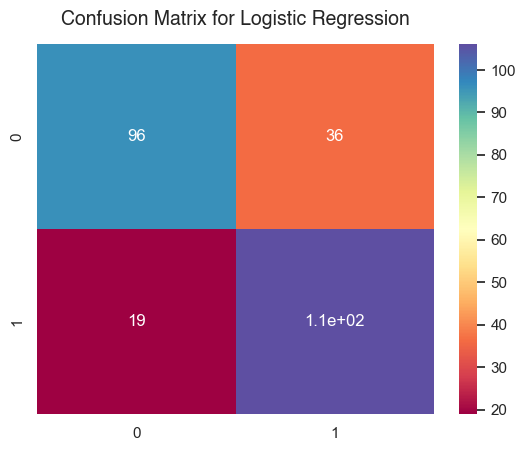

In [29]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report

y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03);

In [30]:
 # Classification report of Logistic Regression
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       132
           1       0.75      0.85      0.79       125

    accuracy                           0.79       257
   macro avg       0.79      0.79      0.79       257
weighted avg       0.79      0.79      0.79       257



# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 45)
rfc.fit(X_train, y_train)

RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier Model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier Model: 98.83268482490273


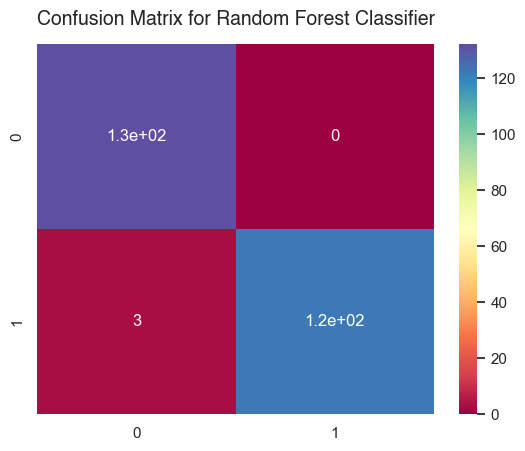

In [32]:
# Confusion Matrix

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [33]:
 # Classification report of Random Forest Classifier
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



# K Neighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(X_train, y_train)

KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier Model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier Model: 84.8249027237354


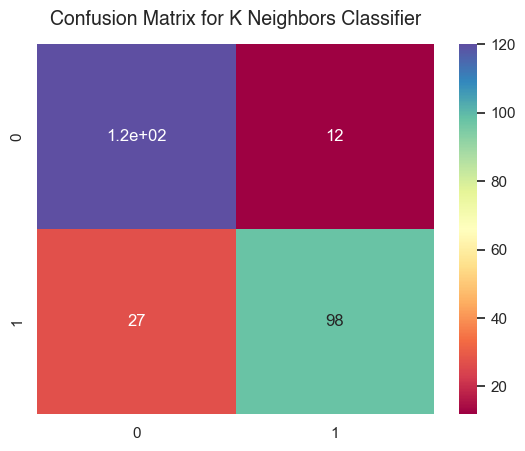

In [35]:
# Confusion Matrix

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [36]:
 # Classification report of K Neighbors Classifier
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       132
           1       0.89      0.78      0.83       125

    accuracy                           0.85       257
   macro avg       0.85      0.85      0.85       257
weighted avg       0.85      0.85      0.85       257



# Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [38]:
GradientBoostingClassifierScore = gb.score(X_test, y_test)
print("Accuracy obtained by Gradient Boosting Classifier Model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier Model: 94.16342412451361


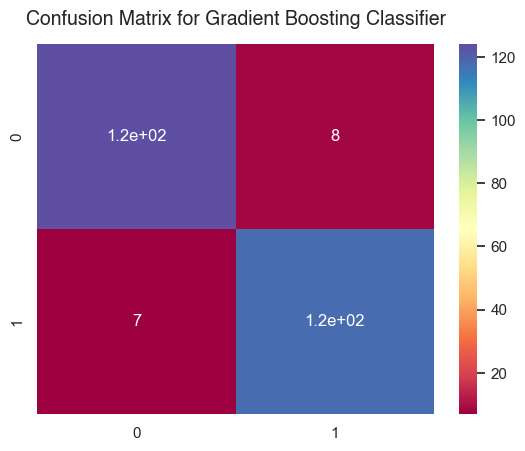

In [39]:
# Confusion Matrix

y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [40]:
 # Classification report of Gradient Boosting Classifier
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       132
           1       0.94      0.94      0.94       125

    accuracy                           0.94       257
   macro avg       0.94      0.94      0.94       257
weighted avg       0.94      0.94      0.94       257



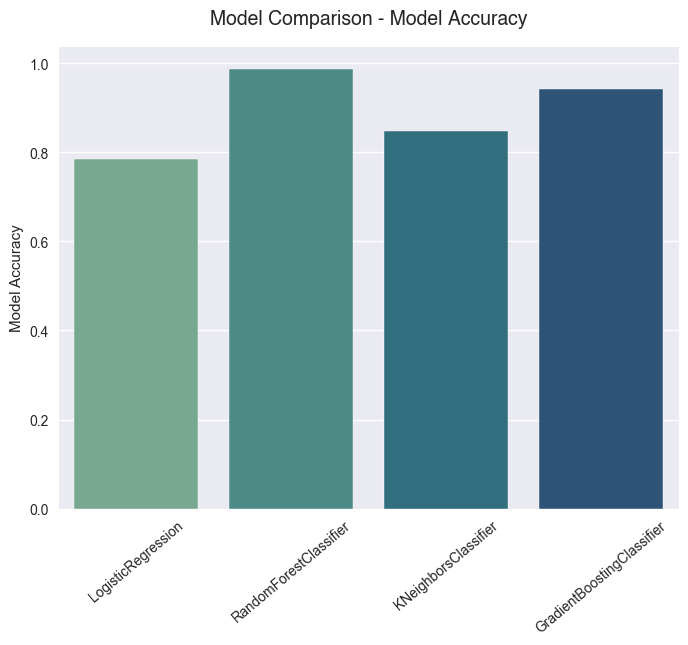

In [41]:
plt.style.use("seaborn")

x=["LogisticRegression", "RandomForestClassifier", 
   "KNeighborsClassifier","GradientBoostingClassifier"]

y=[LogisticRegressionScore,RandomForestClassifierScore,
  KNeighborsClassifierScore,GradientBoostingClassifierScore]

fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(x=x, y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="Helvetica", y=1.03);

In [42]:
# Making a system to test our model

In [43]:
input_data = (52,1,0,4.8,5.3,0,1,5.1,0,1.0,2,2,3)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not suffering from Heart Disease')
else:
  print('The person is suffering from Heart Disease and needs to consult a doctor')

[0]
The person is not suffering from Heart Disease


In [44]:
# Saving the training model

import pickle
filename = 'heart_disease_model.sav'
pickle.dump(rfc, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [45]:
input_data = (52,1,0,4.8,5.3,0,1,5.1,0,1.0,2,2,3)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not suffering from Heart Disease')
else:
  print('The person is suffering from Heart Disease and needs to consult a doctor')

[0]
The person is not suffering from Heart Disease


In [46]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [47]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


import matplotlib.pyplot as plt

# Classification report for algorithm 1
algo1_report = {'precision': [0.2, 0.6, 0.9],
                'recall': [0.8, 0.5, 0.1],
                'f1-score': [0.75, 0.84, 0.78]}

# Classification report for algorithm 2
algo2_report = {'precision': [0.7, 0.8, 0.6],
                'recall': [0.8, 0.7, 0.9],
                'f1-score': [0.74, 0.74, 0.7]}

# Classification report for algorithm 3
algo3_report = {'precision': [0.9, 0.8, 0.7],
                'recall': [0.6, 0.8, 0.9],
                'f1-score': [0.71, 0.79, 0.78]}

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
x = ['precision', 'recall', 'f1-score']
bar_width = 0.2
opacity = 0.8

# Set the positions of the bars on the x-axis
pos1 = list(range(len(x)))
pos2 = [x + bar_width for x in pos1]
pos3 = [x + bar_width for x in pos2]

# Plot the bars for each algorithm
ax.bar(pos1, algo1_report['precision'], bar_width, alpha=opacity, label='Algorithm 1')
ax.bar(pos2, algo2_report['precision'], bar_width, alpha=opacity, label='Algorithm 2')
ax.bar(pos3, algo3_report['precision'], bar_width, alpha=opacity, label='Algorithm 3')

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
ax.set_title('Classification Report Scores by Algorithm')
ax.set_xticks([p + 1.5 * bar_width for p in pos1])
ax.set_xticklabels(x)
ax.legend()

plt.show()
